In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [2]:
badmin = pd.read_csv("athlete_events.csv")
badmin.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No
2,3,Gunnar Nielsen Aaby,M,24.0,170.0,65.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No
3,4,Edgar Lindenau Aabye,M,34.0,170.0,65.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No


In [3]:
fitur_loc = ['Age','Height', 'Weight','Medal']
fitur = ['Age','Height','Weight']
badmin = badmin.loc[:100,(fitur_loc)]
X = badmin[fitur]
y = badmin.Medal
display(badmin)

,Age,Height,Weight,Medal
0,24.0,180.0,80.0,No
1,23.0,170.0,60.0,No
2,24.0,170.0,65.0,No
3,34.0,170.0,65.0,Gold
4,21.0,185.0,82.0,No
...,...,...,...,...
96,24.0,187.0,76.0,No
97,28.0,187.0,76.0,No
98,30.0,187.0,76.0,No
99,24.0,190.0,98.0,No


In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
print(X[0:5,:])

[[-0.69583003  0.35405204  0.44614599]
 [-0.87152712 -1.01603441 -1.22431722]
 [-0.69583003 -1.01603441 -0.80670142]
 [ 1.0611408  -1.01603441 -0.80670142]
 [-1.22292129  1.03909527  0.61319231]]


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("X Training:", X_train[0:5,:])
print("y Training:",y_train[0:5])

X Training: [[-1.0472242  -1.01603441  4.20468822]
 [-1.0472242  -1.01603441 -0.80670142]
 [-0.34443587 -0.19398254  0.8637618 ]
 [ 0.70974664 -0.33099118 -0.89022458]
 [-1.75001254 -1.29005169 -0.80670142]]
y Training: 80        No
91    Bronze
68        No
51        No
27        No
Name: Medal, dtype: object


In [6]:
from sklearn.svm import SVC
clf_svc = SVC(kernel='linear', C=1, random_state=0)
clf_svc.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

In [7]:
y_prediksi = clf_svc.predict(X_test)
print(y_prediksi)

['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No']


Akurasi : 77.41935483870968 %


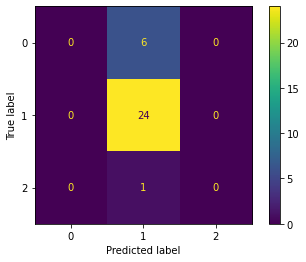

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
cm = confusion_matrix(y_test, y_prediksi)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
akurasi = accuracy_score(y_test, y_prediksi)*100
print("Akurasi : {} %".format(akurasi))